In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao2"
CAND1_PATH = "data/paredao2/babu.csv"
CAND2_PATH = "data/paredao2/petrix.csv"
CAND3_PATH = "data/paredao2/pyong.csv"
CAND4_PATH = "data/paredao2/hadson.csv"



In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)
candidate4_df = pd.read_csv(CAND4_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]
cand4 = candidate4_df[["tweet", "sentiment"]]

# Babu

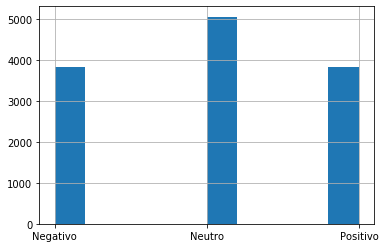

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,Aí fica difícil 😡,Negativo
1,Querida eu não vi isso!\nMas ele sai de qualqu...,Negativo
2,A própria delegada já falou que não é assim ma...,Negativo
3,"Petrix não vai sair , ele pode dar depoimento ...",Neutro
4,Vamos Galera... Da tempo de mudar\n\n#bbb20 @t...,Neutro
...,...,...
12685,"Eu achando que a Acamada estava dormindo, e do...",Negativo
12686,Babu falando da mulher dele é minha nova relig...,Positivo
12687,Se o Babu der o anjo pra Thelma. Qualquer anjo...,Neutro
12688,Babu: “Semana que vem o paredão será quíntuplo...,Neutro


# Petrix (Eliminado)

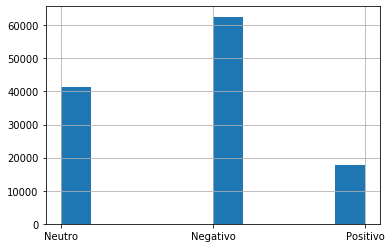

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,#BBB20 Mais um paredão formado no BBB ! Petri...,Neutro
1,"Exatamente, na verdade o todos os homens envol...",Negativo
2,Kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...,Positivo
3,"To com sono, mas preciso ver o @petrixbarbosa ...",Negativo
4,Assim como o @vandersonbrito foi desclassifica...,Negativo
...,...,...
121760,Que ódio que onde o Pyong vai o Petrix vai atr...,Negativo
121761,E se expulsar o petrix e adiar a votação? #bbb20,Neutro
121762,"Gente, é bom lembrar que o Petrix tem torcida ...",Negativo
121763,vocês ainda acham que vão expulsar mesmo o Pét...,Negativo


# Pyong

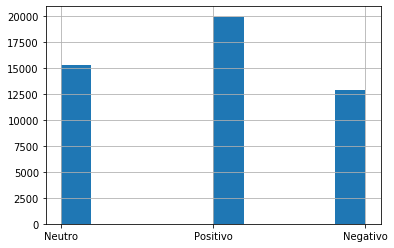

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,#BBB20 Mais um paredão formado no BBB ! Petri...,Neutro
1,Alguém arruma um Oscar pra esse @PyongLeeTV #B...,Positivo
2,pic.twitter.com/w6AsDkg6C2,Neutro
3,Esse Twitter tem que liberar editar.\nEscrevi ...,Negativo
4,pic.twitter.com/AsiyC4sXpw,Neutro
...,...,...
48097,Mano\n\nUm fato é q Petrix é obcecado no Pyong...,Positivo
48098,#BBB20 por favor né ele empurrou o Pyong sim c...,Negativo
48099,Pyong é um babaca #BBB20 https://twitter.com/...,Negativo
48100,Que ódio que onde o Pyong vai o Petrix vai atr...,Negativo


# Hadson

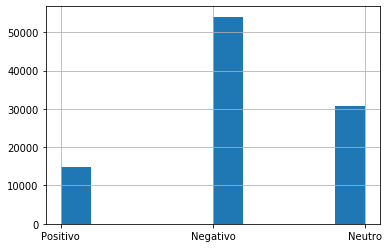

In [11]:
cand4["sentiment"].hist()

In [12]:
cand4

,tweet,sentiment
0,#Repost quebrandootabu (@get_repost)\n・・・\nSe ...,Positivo
1,Só que se @hadsonnery não sair vai parecer que...,Negativo
2,"Verdade @BruMarquezine , mas o mais escroto te...",Negativo
3,Petrix primeiro.,Positivo
4,"#BBB20 @Boninho , eu tô com tanto nojo de @had...",Negativo
...,...,...
99620,gente eu to com medo dessa briga vamos lembrar...,Negativo
99621,"Então na Mari vai só o Prior, Hadson, gallina ...",Neutro
99622,Fato:\n\nHadson movimenta o jogo mais do que P...,Negativo
99623,"Hadson acha q terá 4 ou 5 votos tb, como a Mar...",Negativo


# Quantidades absolutas

In [13]:
candidates = {"babu": cand1, "petrix": cand2, "pyong": cand3, "hadson": cand4}

In [14]:
qtds_df = get_raw_quantities(candidates)

In [15]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,3819,5049,3822
petrix,17850,41331,62584
pyong,19947,15248,12907
hadson,14732,30837,54056


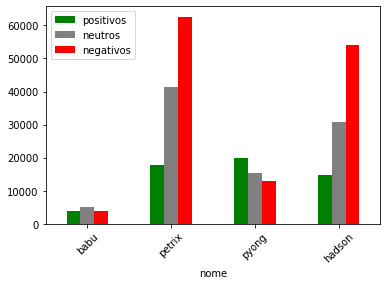

In [16]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [17]:
pcts_df = get_pct_by_candidate(candidates)

In [18]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.300946,0.397872,0.301182
petrix,0.146594,0.339433,0.513974
pyong,0.414681,0.316993,0.268326
hadson,0.147875,0.309531,0.542595


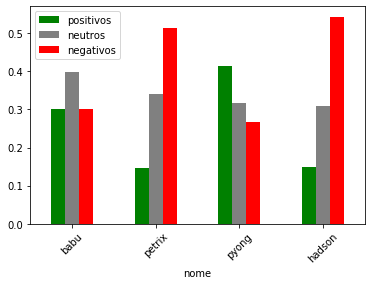

In [19]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [20]:
qtds_df_copy = qtds_df.copy()

In [21]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [22]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.067775,0.054604,0.028657
petrix,0.316781,0.446991,0.469254
pyong,0.353997,0.164906,0.096777
hadson,0.261447,0.333499,0.405312


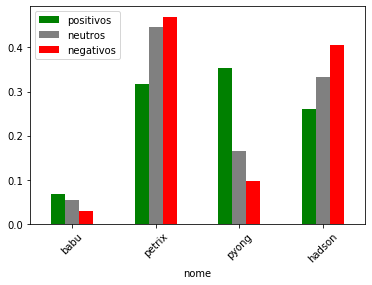

In [23]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [24]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [25]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [26]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]

In [27]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [28]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [29]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
babu,3819,5049,3822,0.300946,0.397872,0.301182,317268,0.0044
petrix,17850,41331,62584,0.146594,0.339433,0.513974,22082,0.8027
pyong,19947,15248,12907,0.414681,0.316993,0.268326,1419089,0.0066
hadson,14732,30837,54056,0.147875,0.309531,0.542595,9524,0.1863


In [30]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))